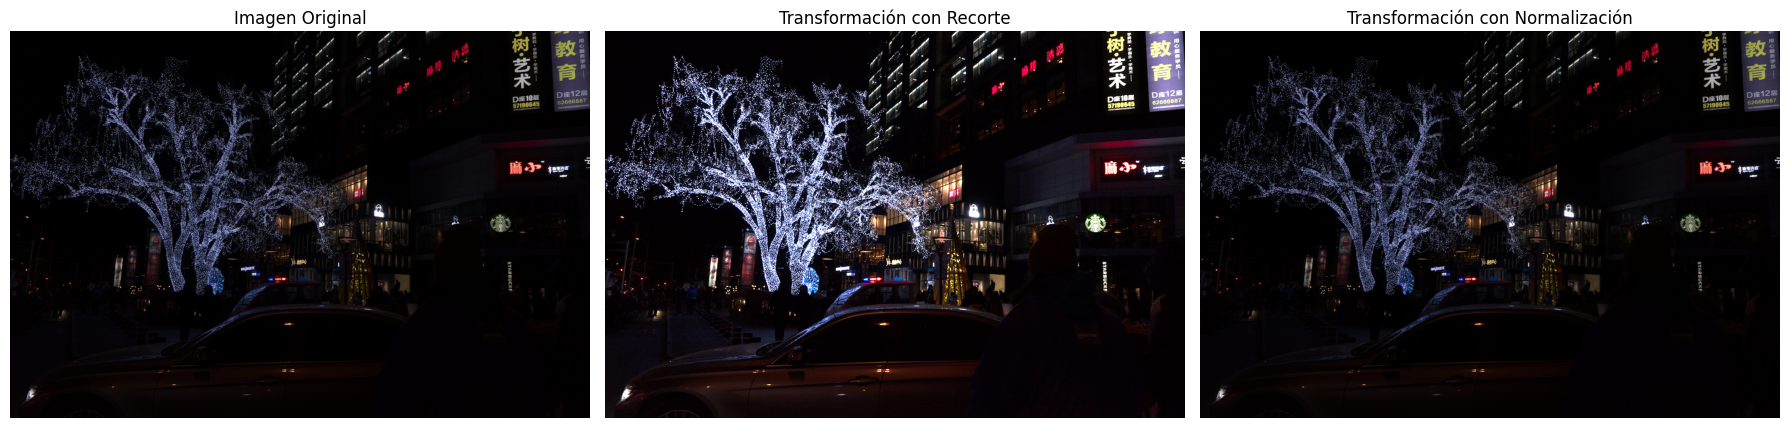

Pixel Imagen Original: [15 22 27]
Pixel Imagen con Recorte: [37 55 67]
Pixel Imagen con Normalización: [15 22 27]


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer imagen nocturna
image = cv2.imread("1010.png", cv2.IMREAD_UNCHANGED)

# Verificar si la imagen es en escala de grises o color
if len(image.shape) == 2:  # Solo tiene ancho y alto, es escala de grises
    is_grayscale = True
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)  # Convertir a RGB para visualización
else:
    is_grayscale = False
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para visualización


 # Definir el factor de escala
factor = 2.5  # Cambia este valor para aumentar o disminuir el brillo (Ejemplo: 0.8 para reducir)

# 1. Transformación con recorte (np.clip)
if is_grayscale:
    image_clipped = np.clip(image * factor, 0, 255).astype(np.uint8)
    clipped_rgb = cv2.cvtColor(image_clipped, cv2.COLOR_GRAY2RGB)  # Para visualizar
else:
    image_clipped = np.clip(image * factor, 0, 255).astype(np.uint8)
    clipped_rgb = cv2.cvtColor(image_clipped, cv2.COLOR_BGR2RGB)

 # 2. Transformación con normalización
if is_grayscale:
    normalized = ((image * factor - np.min(image * factor)) / (np.max(image * factor) - np.min(image * factor)) * 255).astype(np.uint8)
    normalized_rgb = cv2.cvtColor(normalized, cv2.COLOR_GRAY2RGB)  # Para visualizar
else:
    normalized = ((image * factor - np.min(image * factor)) / (np.max(image * factor) - np.min(image * factor)) * 255).astype(np.uint8)
    normalized_rgb = cv2.cvtColor(normalized, cv2.COLOR_BGR2RGB)

 # Mostrar las imágenes lado a lado
plt.figure(figsize=(18, 6))

# Imagen original
plt.subplot(1, 3, 1)
plt.title("Imagen Original")
plt.imshow(image_rgb)
plt.axis("off")

# Imagen con recorte
plt.subplot(1, 3, 2)
plt.title("Transformación con Recorte")
plt.imshow(clipped_rgb)
plt.axis("off");
cv2.imwrite("1010_multi.png", clipped_rgb)
# Imagen con normalización
plt.subplot(1, 3, 3)
plt.title("Transformación con Normalización")
plt.imshow(normalized_rgb)
plt.axis("off")

plt.tight_layout()
plt.show()

#pintar mismo pixel en las 3 imagenes
fila, columna = 400, 700
print(f'Pixel Imagen Original: {image[fila, columna]}')
print(f'Pixel Imagen con Recorte: {image_clipped[fila, columna]}')
print(f'Pixel Imagen con Normalización: {normalized[fila, columna]}')


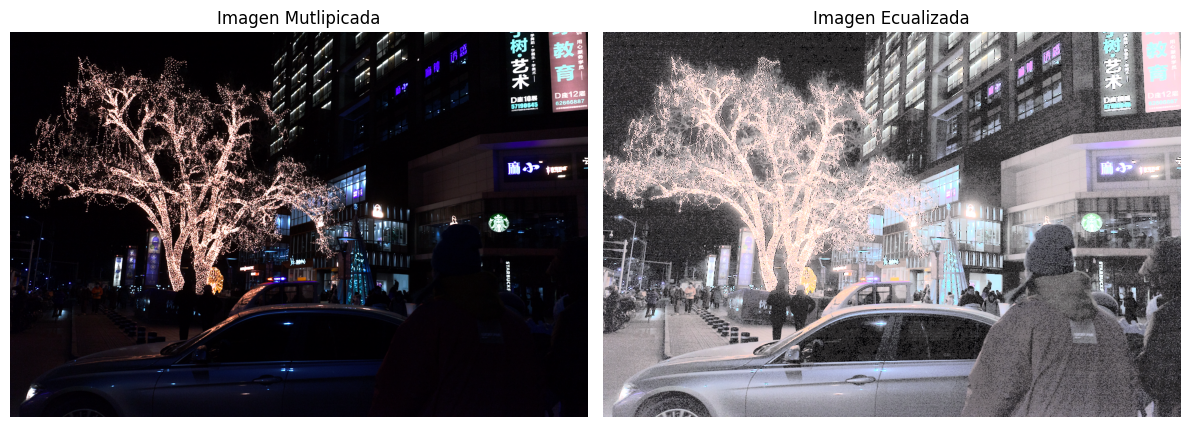

In [2]:
# Cargar imagen
image = cv2.imread("1010_multi.png", cv2.IMREAD_UNCHANGED)

# Convertir al espacio YUV
yuv_image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

# Ecualizar el canal de luminosidad (Y)
yuv_image[:, :, 0] = cv2.equalizeHist(yuv_image[:, :, 0])

# Convertir de vuelta al espacio BGR
result = cv2.cvtColor(yuv_image, cv2.COLOR_YUV2BGR)

# Convertir el resultado al formato RGB para matplotlib
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Mostrar la imagen original y la ecualizada
plt.figure(figsize=(12, 6))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Imagen Mutlipicada")
plt.axis("off")

# Imagen ecualizada
plt.subplot(1, 2, 2)
plt.imshow(result_rgb)
plt.title("Imagen Ecualizada")
cv2.imwrite("1010_ecualizada.png", result_rgb)
plt.axis("off")

plt.tight_layout()
plt.show()

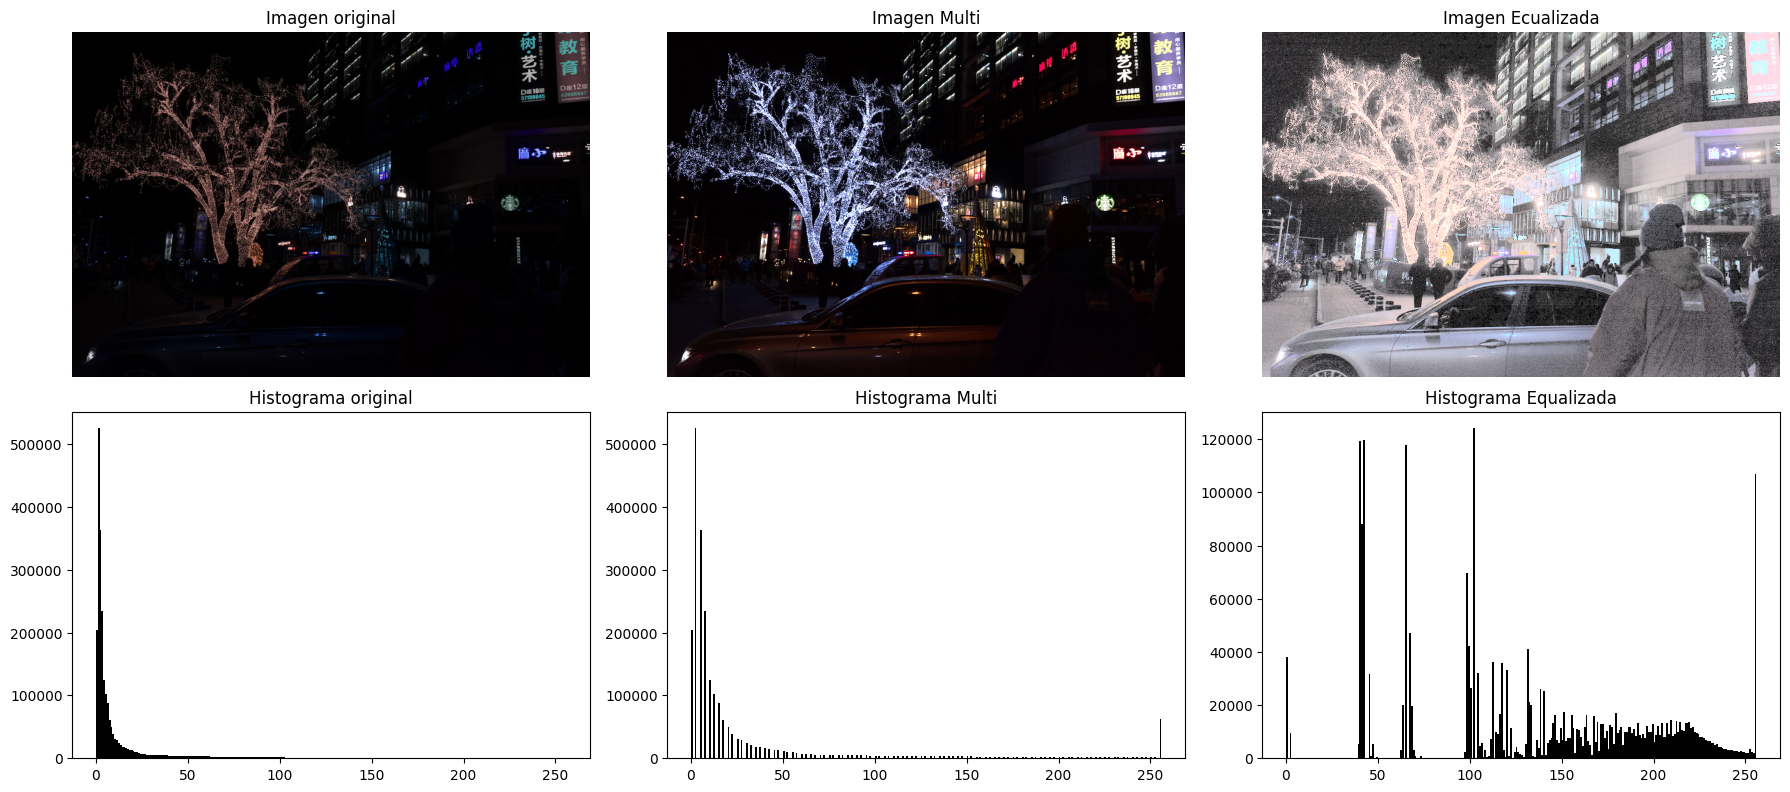

In [4]:
# Cargar imagen
image_original = cv2.imread("1010.png", cv2.COLOR_BGR2RGB)
image_multi = cv2.imread("1010_multi.png", cv2.COLOR_BGR2RGB)
image_equali = cv2.imread("1010_ecualizada.png",cv2.COLOR_BGR2RGB)
plt.figure(figsize=(18, 8))
# Imagen original
plt.subplot(2, 3, 1)
plt.imshow(image_original)
plt.title("Imagen original")
plt.axis("off")
plt.subplot(2, 3, 4)
plt.title("Histograma original")
plt.hist(image_original.ravel(), bins=256, range=(0, 256), color='black')
# Imagen multi
plt.subplot(2, 3, 2)
plt.imshow(image_multi)
plt.title("Imagen Multi")
plt.axis("off")
plt.subplot(2, 3, 5)
plt.title("Histograma Multi")
plt.hist(image_multi.ravel(), bins=256, range=(0, 256), color='black')
# Imagen ecualizada
plt.subplot(2, 3, 3)
plt.imshow(image_equali)
plt.title("Imagen Ecualizada")
plt.axis("off")
plt.subplot(2, 3, 6)
plt.title("Histograma Equalizada")
plt.hist(image_equali.ravel(), bins=256, range=(0, 256), color='black')
# Imagen ecualizada
plt.tight_layout()
plt.show()

#4
plt.figure()
plt.hist(image_original.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Histograma original")
plt.xlabel("Intensidad")
plt.ylabel("Pixeles")
plt.savefig("histograma4_original.png")
plt.close()

#5
plt.figure()
plt.hist(image_multi.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Histograma Multiplicado, factor = 2.5, con recorte")
plt.xlabel("Intensidad")
plt.ylabel("Pixeles")
plt.savefig("histograma4_multi.png")
plt.close()

#6
plt.figure()
plt.hist(image_equali.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Histograma Equalizada")
plt.xlabel("Intensidad")
plt.ylabel("Pixeles")
plt.savefig("histograma4_Mult.png")
plt.close()

